In [84]:
import pandas as pd # нужен
import matplotlib.pyplot as plt # нужен
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns # нужен
import numpy as np # нужен
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import datetime as dt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

path = (r'~/Data_science/NFT_Top_Collections.csv') # Импортируем данные
nft = pd.read_csv(path) # Читаем данные

In [12]:
# Импортируем нужные библиотеки

In [29]:
nft # Просматриваем данные

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,0,basis.markets,27256.63,1.000000,708.145455,0.279802,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00
1,1,Skeleton Crew Skulls,11381.25,0.417559,106.656000,0.042142,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03
2,2,Flippies,6732.19,0.246993,1663.863158,0.657425,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25
3,3,Meerkat Millionaires Country Club,3734.76,0.137022,90.275000,0.035669,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61
4,4,Stylish Studs,3191.15,0.117078,165.000000,0.065195,729,4.30,631.3260,4.377435,642.694984,28,50,56.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,594,Powder Heroes,0.00,0.000000,0.000000,0.000000,0,0.50,73.4100,0.000000,0.000000,2,5,40.00
587,595,NEO MONKEY BUSINESS,0.00,0.000000,0.000000,0.000000,0,0.59,86.6238,0.000000,0.000000,1,2,50.00
588,596,Cops Game,0.00,0.000000,0.000000,0.000000,0,3.99,585.8118,0.000000,0.000000,4,4,100.00
590,598,Duck BRO,0.00,0.000000,0.000000,0.000000,0,0.20,29.3640,0.000000,0.000000,38,56,67.86


In [4]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 581
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              238 non-null    int64  
 1   Name               238 non-null    object 
 2   Volume             238 non-null    float64
 3   Volume_USD         238 non-null    float64
 4   Market_Cap         238 non-null    float64
 5   Market_Cap_USD     238 non-null    float64
 6   Sales              238 non-null    int64  
 7   Floor_Price        238 non-null    float64
 8   Floor_Price_USD    238 non-null    float64
 9   Average_Price      238 non-null    float64
 10  Average_Price_USD  238 non-null    float64
 11  Owners             238 non-null    int64  
 12  Assets             238 non-null    int64  
 13  Owner_Asset_Ratio  238 non-null    float64
 14  Category           238 non-null    object 
 15  Website            238 non-null    object 
 16  Logo               238 non

In [9]:
nft.drop(columns = ["Category","Website","Logo"],inplace = True)

In [ ]:
# Удаляем ненужные столбцы и нулевые значения, которые делают работу с данными более сложной

In [10]:
nft.dropna(inplace=True)

In [11]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 591
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              540 non-null    int64  
 1   Name               540 non-null    object 
 2   Volume             540 non-null    float64
 3   Volume_USD         540 non-null    float64
 4   Market_Cap         540 non-null    float64
 5   Market_Cap_USD     540 non-null    float64
 6   Sales              540 non-null    int64  
 7   Floor_Price        540 non-null    float64
 8   Floor_Price_USD    540 non-null    float64
 9   Average_Price      540 non-null    float64
 10  Average_Price_USD  540 non-null    float64
 11  Owners             540 non-null    int64  
 12  Assets             540 non-null    int64  
 13  Owner_Asset_Ratio  540 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 63.3+ KB


In [13]:
# Затем нормализуем обьем (Volume (USD)) и капитализацию (Cap(USD))
# Эти данные имеют такие значения, которые затрудняют построение графиков, поэтому, нормализуя значения я облегчаю посторение графиков

In [14]:
nft["Market_Cap_USD"] = nft["Market_Cap_USD"]/nft["Market_Cap_USD"].max()
nft["Volume_USD"] = nft["Volume_USD"]/nft["Volume_USD"].max()

In [15]:
# Просмотрим корредяцию и тепловую карту
# Проверим, если у данных в нашем наборе какая-либо корреляция друг с другом

In [16]:
nft.corr()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
Index,1.000000,-0.234445,-0.234445,-0.331022,-0.331022,-0.416273,-0.033973,-0.033973,-0.208543,-0.208543,-0.315575,-0.320982,-0.180560
Volume,-0.234445,1.000000,1.000000,0.356271,0.356271,0.238439,0.069615,0.069615,0.605738,0.605738,0.144694,0.126606,0.066704
Volume_USD,-0.234445,1.000000,1.000000,0.356271,0.356271,0.238439,0.069615,0.069615,0.605738,0.605738,0.144694,0.126606,0.066704
Market_Cap,-0.331022,0.356271,0.356271,1.000000,1.000000,0.400295,-0.009540,-0.009540,0.110256,0.110256,0.414119,0.535009,-0.094358
Market_Cap_USD,-0.331022,0.356271,0.356271,1.000000,1.000000,0.400295,-0.009540,-0.009540,0.110256,0.110256,0.414119,0.535009,-0.094358
Sales,-0.416273,0.238439,0.238439,0.400295,0.400295,1.000000,-0.034665,-0.034665,-0.034781,-0.034781,0.810149,0.751806,0.028560
Floor_Price,-0.033973,0.069615,0.069615,-0.009540,-0.009540,-0.034665,1.000000,1.000000,0.207361,0.207361,-0.044679,-0.052571,0.092825
Floor_Price_USD,-0.033973,0.069615,0.069615,-0.009540,-0.009540,-0.034665,1.000000,1.000000,0.207361,0.207361,-0.044679,-0.052571,0.092825
Average_Price,-0.208543,0.605738,0.605738,0.110256,0.110256,-0.034781,0.207361,0.207361,1.000000,1.000000,-0.069190,-0.084522,0.086463
Average_Price_USD,-0.208543,0.605738,0.605738,0.110256,0.110256,-0.034781,0.207361,0.207361,1.000000,1.000000,-0.069190,-0.084522,0.086463


In [17]:
# Строим тепловую карту

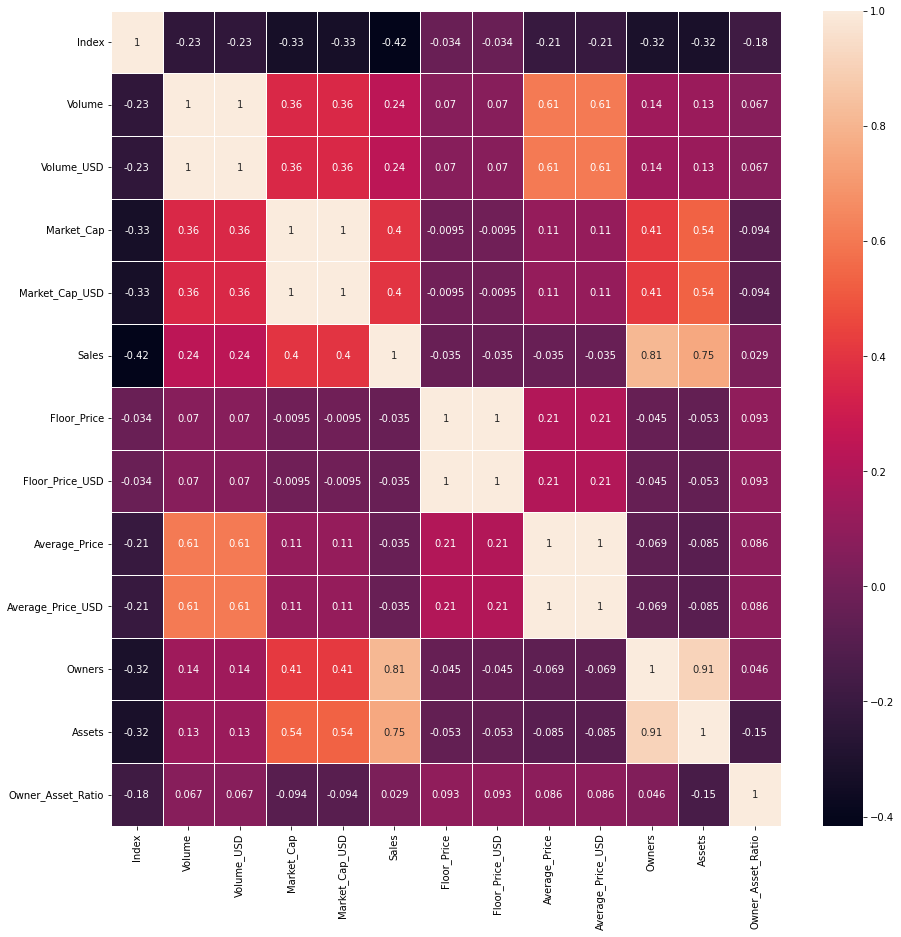

In [18]:
plt.subplots(figsize=(15,15))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

In [ ]:
# Убираем еще столбцы, которые не влияют ни на что

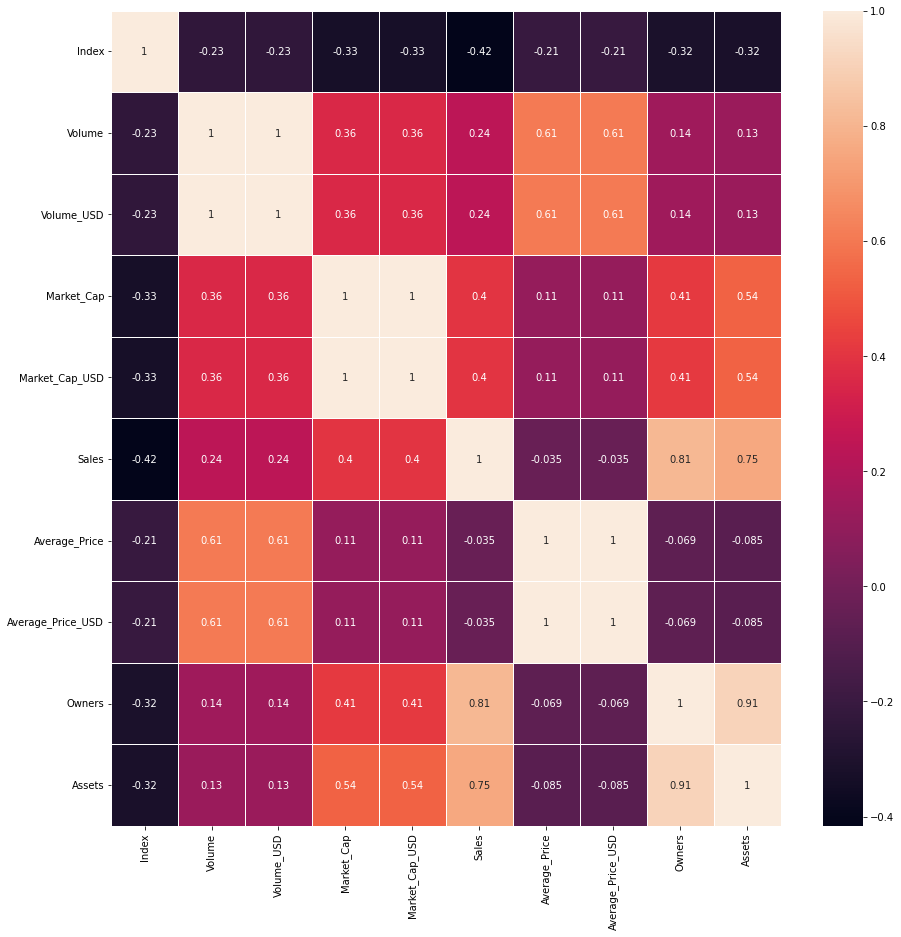

In [66]:
nft.drop(columns = ["Owner_Asset_Ratio","Floor_Price","Floor_Price_USD"],inplace = True)
nft.dropna(inplace=True)
plt.subplots(figsize=(15,15))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

In [69]:
nft.drop(columns = ["Volume","Market_Cap","Average_Price"],inplace = True)
nft.dropna(inplace=True)

KeyError: "['Volume', 'Market_Cap', 'Average_Price'] not found in axis"

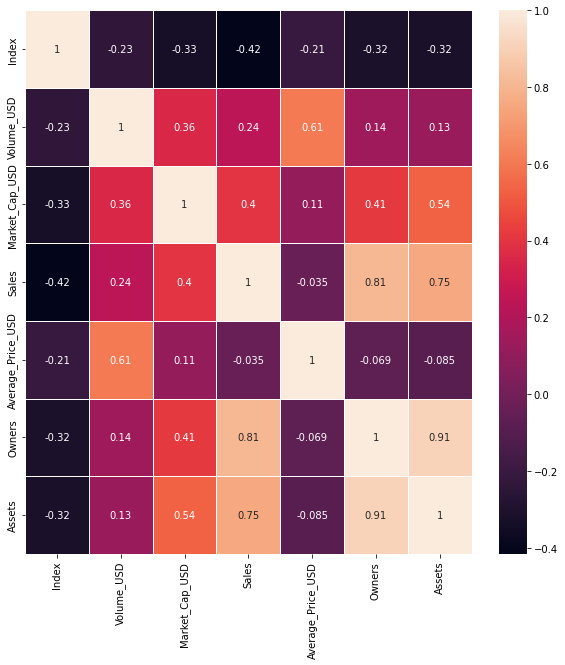

In [70]:
plt.subplots(figsize=(10,10))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

In [19]:
nft.describe()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,297.838889,207.516556,0.007613,49.455651,0.019541,177.403704,2.437130,357.819372,1.617846,237.532201,58.761111,127.714815,54.224852
std,172.801027,1342.088058,0.049239,187.209992,0.073970,470.371171,19.051702,2797.170904,4.868120,714.737314,139.157205,260.802828,27.568784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,2.936400,0.000000,0.000000,1.000000,1.000000,0.260000
25%,149.750000,7.187500,0.000264,0.000000,0.000000,13.000000,0.110000,16.150200,0.284943,41.835335,6.000000,15.000000,33.330000
50%,296.500000,18.545000,0.000680,0.180625,0.000071,37.000000,0.300000,44.046000,0.653049,95.880622,19.000000,44.000000,57.195000
75%,447.250000,78.257500,0.002871,24.753000,0.009780,120.500000,1.000000,146.820000,1.387940,203.777320,48.000000,114.250000,72.740000
max,599.000000,27256.630000,1.000000,2530.877143,1.000000,5229.000000,400.000000,58728.000000,74.471667,10933.930100,2041.000000,3320.000000,100.000000


In [20]:
# Аналитика по "ящикам с усами"
# "Ящики с усами" это отличныый иструмент для того, чтобы посмотреть выбросы в наших данных более наглядным способом

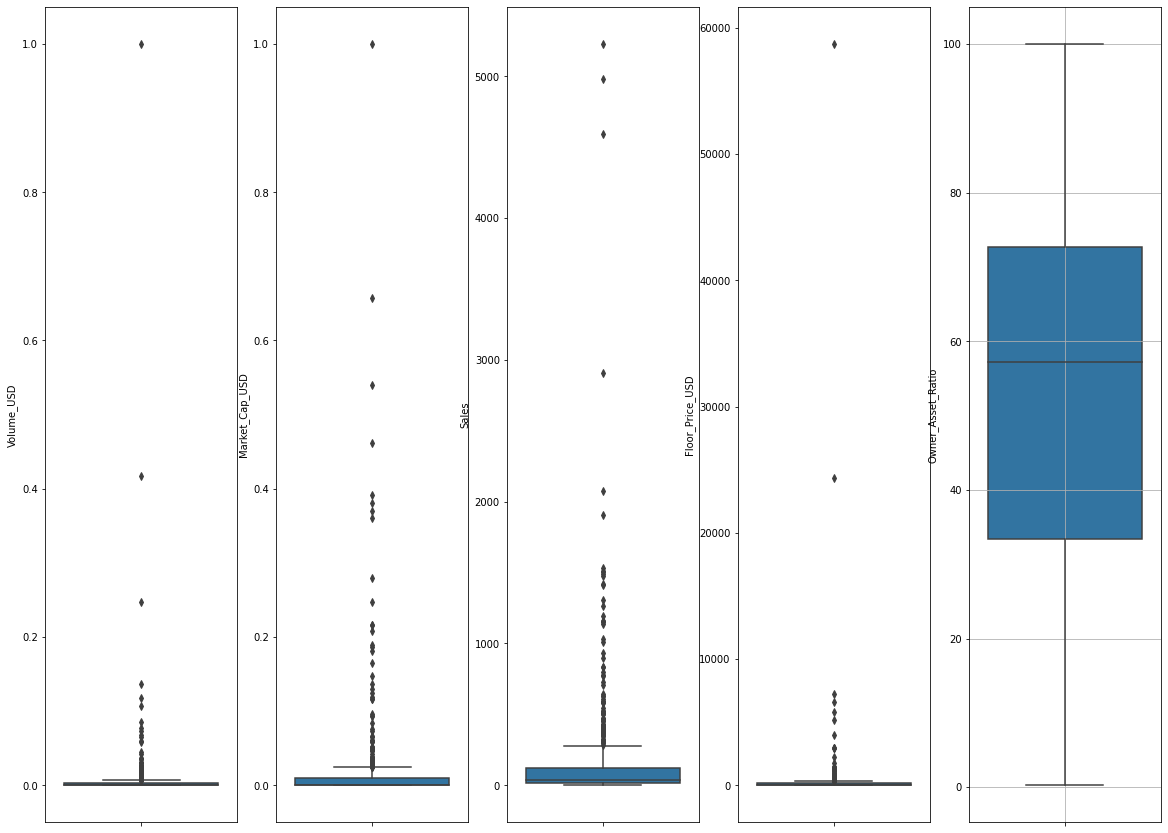

In [21]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
sns.boxplot(y =nft.Volume_USD ,data = nft,ax = ax[0])
sns.boxplot(y =nft.Market_Cap_USD ,data = nft,ax = ax[1])
sns.boxplot(y =nft.Sales ,data = nft,ax = ax[2])
sns.boxplot(y =nft.Floor_Price_USD,data = nft,ax = ax[3])
sns.boxplot(y =nft.Owner_Asset_Ratio ,data = nft,ax = ax[4])
plt.grid(True)
plt.show()

In [22]:
# Сортируем данные

In [53]:
new_index = nft.Owner_Asset_Ratio.sort_values(ascending = False).index.values
sorted_nft = nft.reindex(new_index)
sorted_nft.index = range(0,540)
top_nft = sorted_nft.loc[0:540]
top_nft

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,366,Solana Monkey University,12.27,0.000450,0.000000,0.000000,11,2.49,365.5818,1.115455,163.771036,1,1,100.00
1,51,Piggy Sol Gang,340.08,0.012477,33.950000,0.013414,52,3.50,513.8700,6.540000,960.202800,15,15,100.00
2,202,I CAN WRITE NEAT,41.60,0.001526,0.000000,0.000000,13,20.00,2936.4000,3.200000,469.824000,1,1,100.00
3,549,Solanum Nigrum,4.50,0.000165,0.000000,0.000000,18,1.00,146.8200,0.250000,36.705000,2,2,100.00
4,389,Proto Pass,10.87,0.000399,0.836154,0.000330,13,1.20,176.1840,0.836154,122.764108,1,1,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,403,SOL CASH NFT,10.00,0.000367,90.000000,0.035561,10,1.00,146.8200,1.000000,146.820000,1,90,1.11
536,110,Lift-off Pass,128.25,0.004705,0.000000,0.000000,27,4.75,697.3950,4.750000,697.395000,1,106,0.94
537,245,Abstracto Sol,30.00,0.001101,0.000000,0.000000,18,1.00,146.8200,1.666667,244.700000,2,262,0.76
538,54,SOLEX S2 Mystery Box,318.52,0.011686,477.780000,0.188780,642,0.49,71.9418,0.496137,72.842845,6,963,0.62


In [24]:
# Строим 500 популярных NFT

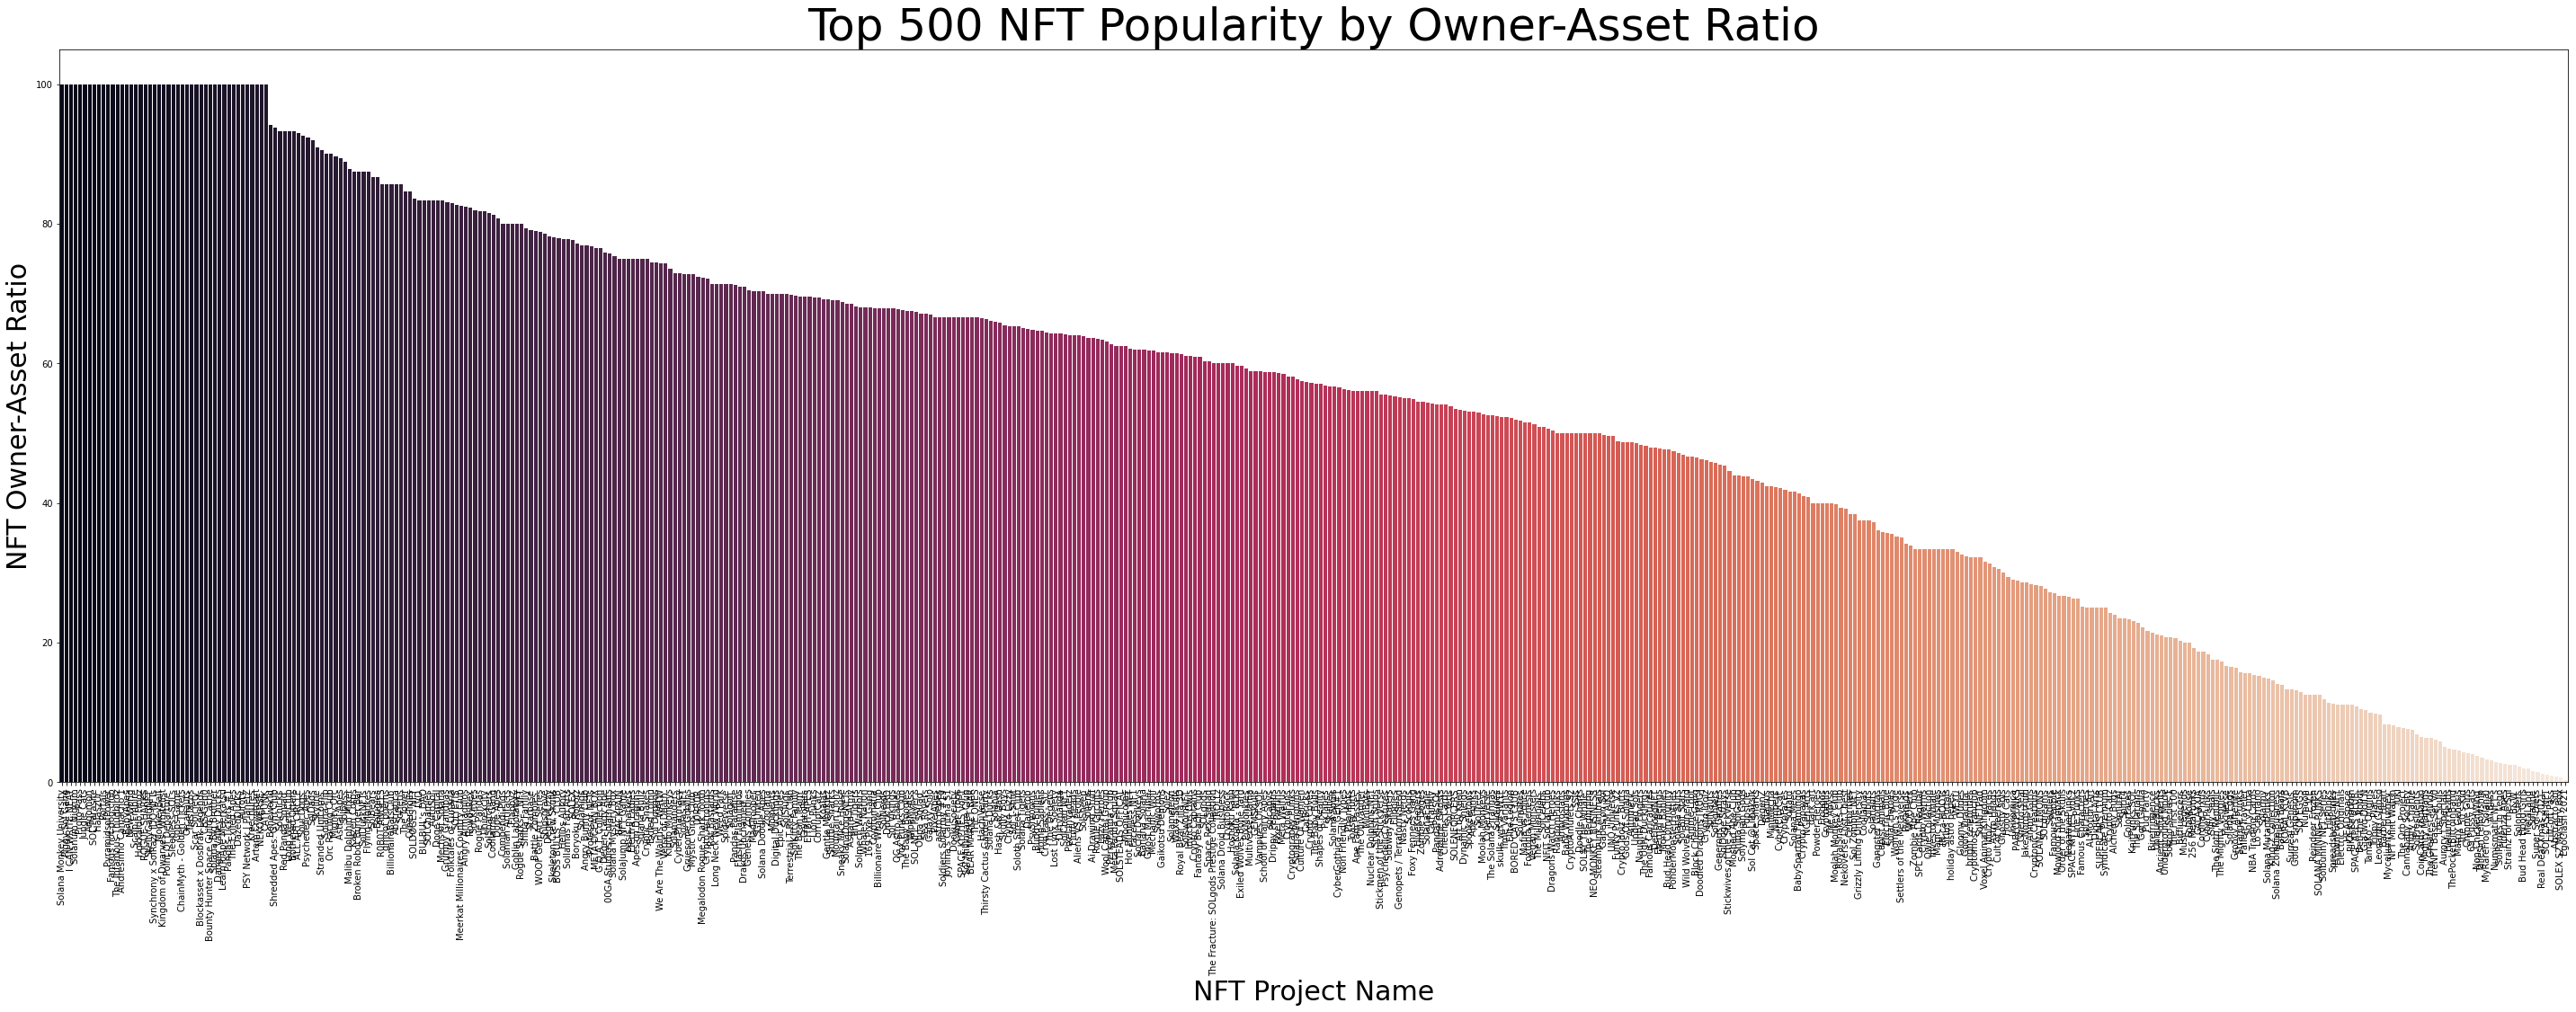

In [72]:
plt.subplots(figsize=(50,15))
sns.barplot(x=top_nft.Name,y=top_nft.Owner_Asset_Ratio.sort_values(),palette = "rocket")
plt.xticks(rotation = 90)
plt.xlabel("NFT Project Name",fontsize =30)
plt.ylabel("NFT Owner-Asset Ratio",fontsize =30)
plt.title("Top 500 NFT Popularity by Owner-Asset Ratio",fontsize =50)
plt.show()

In [55]:
av_price_index = nft.Average_Price_USD.sort_values(ascending = False).index.values
floor_price_index = nft.Floor_Price_USD.sort_values(ascending = False).index.values
av_price_data = nft.reindex(av_price_index)
floor_price_data = nft.reindex(floor_price_index)

In [62]:
av_price_data.Average_Price_USD = av_price_data.Average_Price_USD/max(av_price_data.Average_Price_USD)
floor_price_data.Floor_Price_USD = floor_price_data.Floor_Price_USD/max(floor_price_data.Floor_Price_USD)
av_price_data = av_price_data.reindex(range(0,50))
floor_price_data = floor_price_data.reindex(range(0,50))
av_price_data = av_price_data.iloc[0:50]
floor_price_data = floor_price_data.iloc[0:50]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


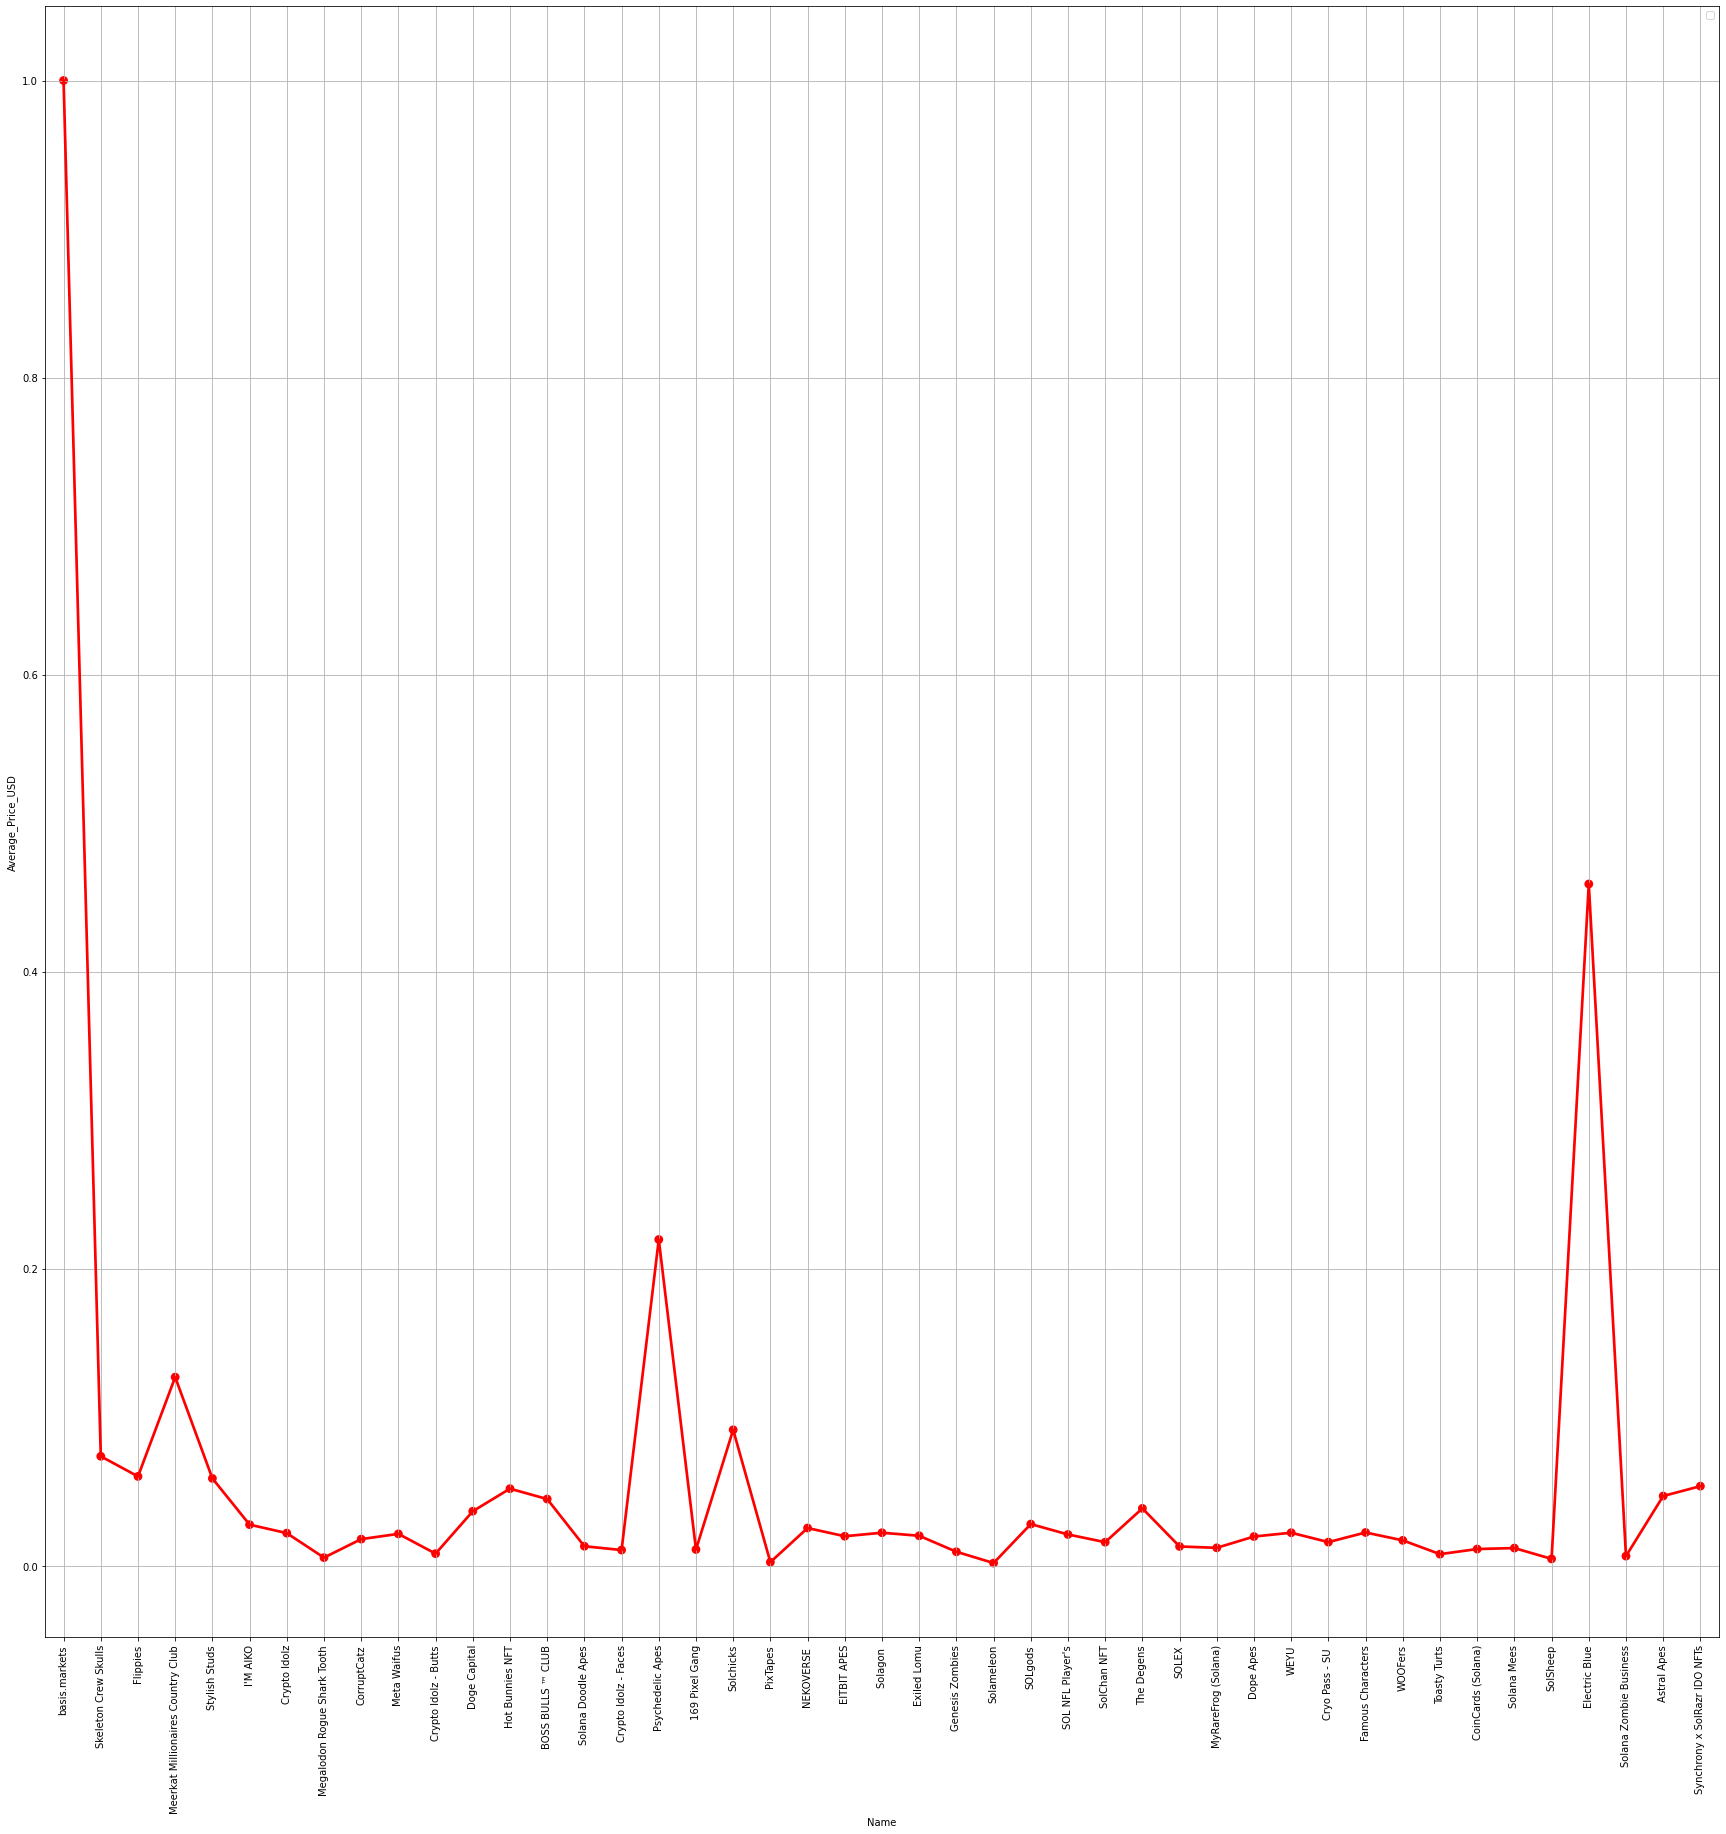

In [63]:
plt.subplots(figsize=(30,30))
sns.pointplot(x = "Name",y="Average_Price_USD",data =av_price_data,color="red" )
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

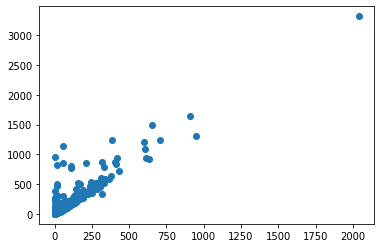

In [40]:
plt.scatter(nft.Owners,nft.Assets)
plt.show()
# Количество владельцев нфт коллекцией
# Количество предметов нфт в коллекции
# График показывает, сколько людей каким количеством нфт владеет

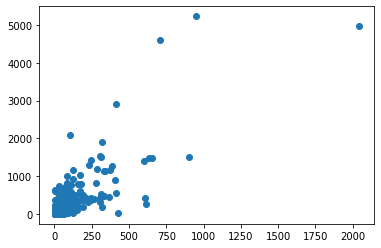

In [42]:
plt.scatter(nft.Owners,nft.Sales)
plt.show()
# Количество владельцев нфт коллекцией 
# Количество продаж из коллекции
# Показывает сколько людей покупают нфт из той же коллекции

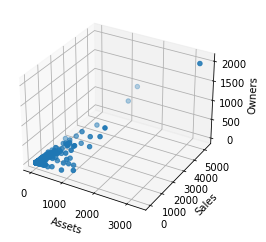

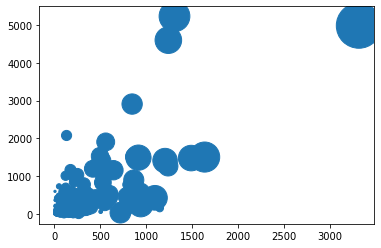

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = nft['Assets']
y = nft['Sales']
z = nft['Owners']

ax.set_xlabel("Assets")
ax.set_ylabel("Sales")
ax.set_zlabel("Owners")

ax.scatter(x, y, z)

plt.show()

plt.scatter(nft.Assets,nft.Sales, nft.Owners)
plt.show()
# Количество предметов нфт в коллекции
# Количество продаж из коллекции
# Показывает как часто покупают нфт из той же коллекции

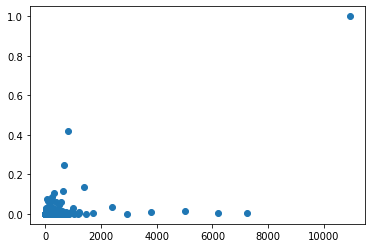

In [45]:
plt.scatter(nft.Average_Price_USD,nft.Volume_USD)
plt.show()
# Средняя цена нфт коллекции в долларах
# Объем продаж нфт коллекции в долларах
# Распределение объема продаж и цены

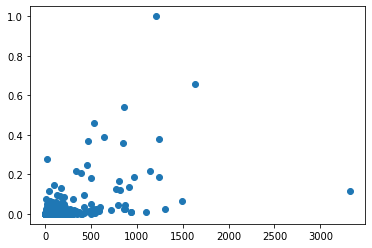

In [46]:
plt.scatter(nft.Assets,nft.Market_Cap_USD)
plt.show()
# Количество предметов нфт в коллекции 
# Рыночная капитализация — общая стоимость предметов коллекции, находящихся в обращении, в долларах США 
# Если в коллекции много нфт, то их общая стоимость больше

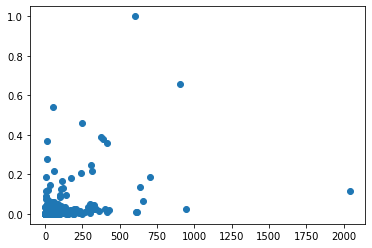

In [71]:
plt.scatter(nft.Owners,nft.Market_Cap_USD)
plt.show()
# Количество владельцев нфт коллекцией
# Рыночная капитализация — общая стоимость предметов коллекции, находящихся в обращении, в долларах США 
# Показывает стоимость портфеля владельцев

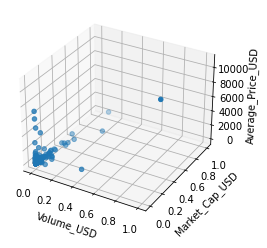

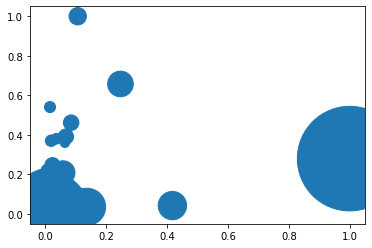

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = nft['Volume_USD']
y = nft['Market_Cap_USD']
z = nft['Average_Price_USD']

ax.set_xlabel("Volume_USD")
ax.set_ylabel("Market_Cap_USD")
ax.set_zlabel("Average_Price_USD")

ax.scatter(x, y, z)

plt.show()

plt.scatter(nft.Volume_USD,nft.Market_Cap_USD, nft.Average_Price_USD)
plt.show()

In [74]:
from sklearn.cluster import Birch

In [ ]:
def Birch_method(features, predict_values):
    X = nft[features]
    Y = nft['Average_Price_USD']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2020, stratify=Y)
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    y_train = np.array(y_train)
    birch = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
    birch.fit(X_train_scaled, y_train)
    print(f'SVM score {round(knn_model.score(X_train_scaled, y_train), 2)}')
    y_pred = knn_model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"The accuracy of the model is {round (score, 4) * 100} %")
    predict_data = [predict_values]
    predict_data_scaled = ss.transform(predict_data)
    new_class = knn_model.predict(predict_data)
    if new_class[0] in dict_of_classes.keys():
        class_name = dict_of_classes[new_class[0]]
    print(f'Предсказанный класс: {class_name}')